# Методы обучения с учителем

Концепция "обучения с учителем" (Supervised Learning) в теории искусственного интеллекта и, в частности, в машинном обучении реализует естественный и понятный механизм обучения системы (биологической или технической) на основе передачи знаний от учителя к ученику в виде конкретных примеров "стимул-реакция".

Непосредственно в задаче машинного обучения данный подход подразумевает настройку параметров некоторой модели, реализующей, например, правило классификации или регрессии при обучении на примерах, представленными в виде набора входных сигналов (стимулов) и выходных (реакции). Т.е. набор данных при обучении с учителем подразумевает разделение на входные параметры $X$ - обычно свойства объектов, процессов, и выходные параметры $Y$ - правильный ответ системы $Y(X)$ 

### Алгоритм k ближайших соседей (K Nearest Neighbours - KNN)

Данный алгоритм решает **задачу классификации** произвольного объекта по принципу "ты есть то, чем являются твои соседи" (большинство соседей).

В основе алгоритма (как и большинства алгоритмов классификации) лежит **"гипотеза компактности"**, заключающая в предположении, что объекты, принаждежащие оному классу формируют компактные множества в пространстве признаков.


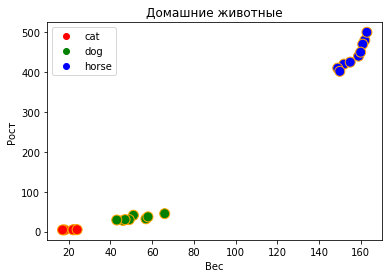

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

animals = pd.DataFrame({"weight": [32.1, 4.2, 4.9, 4.5, 45, 37, 41, 4.2, 420, 410, 425, 4.8, 30, 402, 28, 30, 29, 480, 500, 440, 470, 450 ], 
                        "height": [57, 18, 23, 22, 66, 58, 51, 17, 152, 149, 155, 24, 49, 150, 46, 47, 43, 162, 163, 159, 161, 160], 
                        "class": ["dog","cat","cat","cat","dog","dog","dog","cat","horse", "horse","horse", "cat", "dog", "horse","dog","dog","dog","horse","horse","horse","horse","horse" ]})
ordEnc = OrdinalEncoder()
animals["classEnc"] = ordEnc.fit_transform(animals[["class"]]).astype(int)
scat = plt.scatter(x = animals.height, y = animals.weight, c = animals.classEnc, cmap = ListedColormap(["red", "green", "blue"]), edgecolors = "orange", s = 100)
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Домашние животные")
plt.legend(handles=scat.legend_elements()[0], labels = list(ordEnc.categories_[0]))
plt.show()

Как можно видеть, объекты, в большинстве принадлежащие одному классу, имеют схожие свойства и поэтому образуют группы точек, близких друг к другу в пространстве признаков, при этом достаточно отстоящих от других групп. 

Но здесь так же могут быть исключения: некоторые породы собак по параметрам "рост" и "вес" неотличимы от кошек. Однако, это скорее, изъян постановки задачи и выбора пространства признаков, нежели самой гипеотезы компактности.


#### Рассмотрим наглядный пример работы метода на искусственом наборе данных

Сгенерируем 3 кучки точек (нормальным распределением) и наглядно рассмотрим работу улгоритма: 

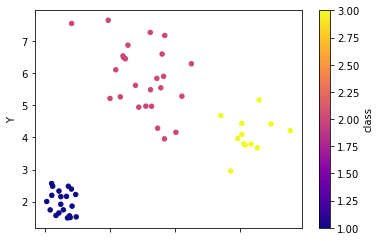

In [2]:

#первая кучка вокруг точки (2.5, 2)
x1 = np.random.normal(2.5, 0.3, 20)
y1 = np.random.normal(2.0, 0.3, 20)
dat = pd.DataFrame({"X": x1, "Y": y1, "class": 1})

#вторая кучка вокруг точки (5, 6)
x2 = np.random.normal(5.0, 1.0, 25)
y2 = np.random.normal(6.0, 1.0, 25)
add = pd.DataFrame({"X": x2, "Y": y2, "class": 2})
dat = pd.concat([dat, add], ignore_index = True)

#третья кучка вокруг точки (8, 4)
x3 = np.random.normal(8.0, .7, 12)
y3 = np.random.normal(4.0, .6, 12)
add = pd.DataFrame({"X": x3, "Y": y3, "class": 3})
dat = pd.concat([dat, add], ignore_index = True)

#dat.groupby(by = "class").agg([np.mean, np.std])

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.show()


Задача состоит в определении, какому классу будет относиться новая произвольная точка, не входящая в исходный набор данных (*обучающую выборку*)


Координаты тестовой точки: [1.80599289 4.47020911]


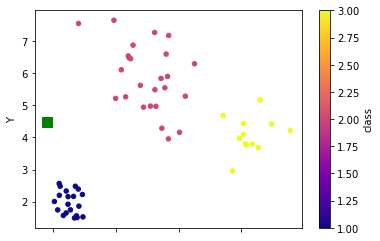

In [8]:
arbitrX = np.random.uniform(0,10,2)
#arbitrX = np.array([[6.5,5]])
print(f"Координаты тестовой точки: {arbitrX}")

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.plot(arbitrX[0], arbitrX[1], "gs", markersize = 10)
plt.show()

К какому классу отнести эту точку?

### KNeighborsClassifier (библиотека sklearn)

Методы биб-ки **sklearn** используют данные типа **numpy.array**

Если используем датасет **Pandas**, то необходимо преобразовать данные методом *to_numpy()*


Каждый объект в задаче машинного обучения представляет собой объединение свойств - объединение столбцов таблицы

Также важно следить за размерностями массивов

In [32]:
dat.head()

,X,Y,class
0,2.270467,2.224531,1
1,1.935367,2.289779,1
2,2.772715,1.923671,1
3,2.163533,2.053172,1
4,2.624945,2.074014,1


In [9]:
knnX = dat[["X","Y"]].to_numpy()
knnY = dat[["class"]].to_numpy()
print(knnX.shape)
print(knnY.shape)

(57, 2)
(57, 1)


Выходную переменную (метки классов) нужно преобразовать к одномерной структуре

Значение -1 в каком-либо измерении функции *reshape()* указывает на автоматический подсчет кол-ва элементов. В данном случае это аналогично *reshape(57)*

Тестовые данные требуется привести к форме обучающих данных. Для тестовой точки вызов *reshape(1,-1)* означает приведение массива [testx, testY] к двумерному виду [[testx, testY]], т.е. по первому измерению 1 элемент - сам массив с координатами точки, а по второму измерению -1 означает автоматический подбор по количеству координат (аналогично *reshape(1,2)*)

In [24]:
knnY = knnY.reshape(-1)
print(f"Y shape: {knnY.shape}")
arbitrX = arbitrX.reshape(1,-1)
print(f"Test X shape: {arbitrX.shape}")

Y shape: (57,)
Test X shape: (1, 2)


Предсказаный класс точки: [1]
5 ближайших соседей:
[[[2.20055551 2.56261062]
  [2.23246329 2.47766273]
  [2.71532789 2.47737988]
  [2.42569771 2.32742555]
  [2.80935106 2.38914857]]]


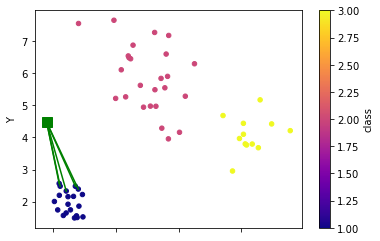

In [26]:
from sklearn.neighbors import KNeighborsClassifier

neighborCount = 5
knn = KNeighborsClassifier(n_neighbors = neighborCount)
knn.fit(knnX , knnY)

prediction = knn.predict( arbitrX )
print(f"Предсказаный класс точки: {prediction}")
neighborsIndex = knn.kneighbors(X = arbitrX, n_neighbors = neighborCount, return_distance = False)
print(f"{neighborCount} ближайших соседей:")
print(knnX[neighborsIndex])

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.plot(arbitrX[0][0], arbitrX[0][1], "gs", markersize = 10)
for idx in neighborsIndex[0]:
    lineX = [arbitrX[0][0], knnX[idx][0]]
    lineY = [arbitrX[0][1], knnX[idx][1]]
    plt.plot( lineX, lineY, "g-" )
plt.show()

Для вычисления расстояний KNeighborsClassifier итспользует метрику Минковского с параметром по умолчанию $p=2$ - Евклидова метрика:

$\rho (x,y) = \left(\displaystyle\sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$

#### Насколько адекватно и корректно работает данная модель? Как проверить на известных данных?

В задачах машинного обучения помимо процедуры **обучения на данных**, выполняется процедура **проверки на тестовых данных**

Имеющийся набор данных, если не предоставляет готовое разбиение на обучающую и тестовую выборки (например MNIST), разбивают на **обучающую выборку** и **тестовую выборку**. 

Разбиение обычно выполняется в пропорциях 80% / 20%, 75% / 25% - большая часть примеров, очевидно, идет на обучение. При этом разбиения должны быть сбалансированы по количеству примеров каждого из классов. 

Для выборок независимых друг от друга объектов/наблюдений обычно делается случайная равномерная выборка.

Для временных рядов (когда считаем, что наблюдение в момент t зависит от предыдущих t-1, t-2,... наблюдений ) случайный сэмплинг недопустим. В этом случае берутся "непрерывные" интервалы или скользящие окна.

### train_test_split

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()

Для использования методов, использующих метрику, необходимо произвести нормализацию значений признаков

In [28]:
vMin = iris.data.min( axis = 0 )
x = (iris.data - vMin) / (iris.data.max( axis = 0 ) - vMin)

Разделим выборку на обучающую и тестовую 

In [31]:
xTrain, xTest, yTrain, yTest = train_test_split(x, iris.target, test_size = 0.33, shuffle = True)

In [35]:
irisKnn = KNeighborsClassifier(n_neighbors = 3)
irisKnn.fit(xTrain, yTrain)
yPred = irisKnn.predict(xTest)
yPred

array([2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 0, 2, 2, 2, 1])

In [34]:
yTest

array([2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 2, 1, 2, 1])

In [36]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred, return_counts=True)
print(f"Кол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

Кол-во меток классов в тестовой: [12 15 23],
Кол-во меток классов в предсказании: [12 17 21]


Сопоставление результатов предсказания с фактическими метками - **Confusion Matrix** (матрица ошибок)

### Confusion Matrix

In [37]:
conMat = confusion_matrix(yTest, yPred )
conMat

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 20]])

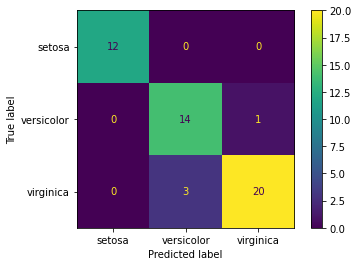

In [50]:
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat, display_labels = iris.target_names)
cmDisp.plot()
plt.show()

TP - True Positive (истинно положительный результат) - верно отнесли объект к классу (главная диагональ)

FP - False Positive (ложно-положительный результат) - ложно подтвердили принадлежность объекта к классу 

TN - True Negative (истинно отрицательный результат) - характерен для бинарной классификации, а не классовой: верно исключили принадлежность к классу (обратное к TP)

FN - False Negative (ложно-отрицательный результат) - ложно исключили объект из класса

Recall: $R = \frac{TP}{TP + FN}$ 

Precision: $P = \frac{TP}{TP + FP}$

Accuracy: $A = \frac{TP + TN}{Total values}$

F1-мера: $F1 = \frac{2 \cdot Recall \cdot Accuracy}{Recall + Accuracy}$

Recall для метки "1": $R_1 = \frac{21}{21 + 1} = 0.95$ (1 метка ложно-отрицательная FN, ложно исключили из класса)

Precision для метки "1": $P_1 = \frac{21}{21 + 0} = 1$ (нет ложно-положительных меток, нет ошибочно принятых в класс "1")

Precision для метки "2": $P_2 = \frac{17}{17 + 1} = 0.94$ (1 метка ложно-положительная FP, ложно приняли в класс)

In [39]:

print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.93      0.87        15
           2       0.95      0.87      0.91        23

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.93      0.92      0.92        50



### Задача регресии (K ближайших соседей)

Задача регрессии заключается в предсказании значения зависимой (целевой) переменной. Метод k ближайших соседей аналогично ищет наиболее близкие в смысле заданной метрики объекты в пространстве признаков, а затем интерполирует значения их зависимого целевого параметра (аналогично выбору класса большинства ближайших соседей)

### KNeighborsRegressor (библиотека sklearn)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston

boston = load_boston()


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(boston.data)


In [42]:
bosXTrain, bosXTest, bosYTrain, bosYTest = train_test_split(x, boston.target, test_size = 0.25)

In [43]:
bostonRegr = KNeighborsRegressor(n_neighbors=5)
bostonRegr.fit(bosXTrain, bosYTrain)
bosYPred = bostonRegr.predict(bosXTest)

In [44]:
bosYPred

array([36.04, 24.6 , 21.8 , 14.44, 20.96, 15.74, 23.8 , 20.5 , 36.04,
       24.24, 17.36, 18.66, 21.16, 27.2 , 16.26, 19.26, 25.82, 16.32,
       19.16, 14.66, 25.32, 22.54, 29.84, 12.84, 20.86,  8.88, 12.74,
        8.72, 12.5 , 20.92, 26.38,  8.86,  8.62, 26.74, 23.34, 20.7 ,
       31.94, 18.52, 15.4 , 34.74, 19.76, 18.7 , 20.78, 21.36, 24.06,
       24.34, 22.82, 19.22, 10.82, 33.14, 27.1 , 13.14,  9.72, 23.28,
       26.06, 30.2 , 20.78, 30.8 , 24.54, 31.2 , 12.  , 15.06, 16.62,
       22.66, 21.58, 24.92, 17.94, 19.62, 22.64, 14.8 , 23.96, 20.7 ,
       20.14, 22.64, 19.16, 20.92, 21.9 , 24.38, 41.78, 21.34, 24.3 ,
       39.82, 24.68, 20.1 , 18.36, 21.38, 21.38, 28.96,  9.6 , 22.32,
       25.1 , 12.1 , 17.3 , 15.76, 30.84, 19.44, 11.56, 37.88, 13.48,
       17.4 , 21.  , 34.98, 41.48, 20.12, 21.92, 36.14, 24.  , 31.46,
        9.38, 21.34, 21.8 , 32.42, 22.42, 17.44, 22.86, 22.22, 34.28,
       21.16, 21.7 , 17.12, 23.18, 19.72, 13.86, 23.5 , 20.16, 43.92,
       21.24])

In [45]:
bosYTest

array([43.1, 24.8, 21.5, 16.7, 20.2, 13.6, 24.8, 18.9, 36. , 24.7, 17.5,
       21.5, 23.2, 29.4, 15.6, 22.2, 35.4, 13.3, 21.4, 14.1, 26.2, 23.7,
       32.7,  8.1, 20.3, 10.5,  9.6,  7. , 13.3, 17.2, 29.1,  8.7, 17.9,
       27.5, 29.6, 29.8, 31.6, 18.5, 17.8, 35.2, 16.2, 20.4, 21.8, 20.4,
       24.4, 23.6, 27.1, 19.1, 13.4, 34.9, 34.9, 17.1, 10.2, 22.9, 23.9,
       23.6, 19.9, 33.1, 23.8, 32.9, 11.5, 13.4, 16.6, 22.8, 21.1, 23.9,
       19.7, 19.8, 23.2, 12.7, 24.4, 20.5, 18.7, 36.2, 18.8, 20.3, 16.1,
       30.1, 38.7, 22.4, 23.9, 41.7, 22.5, 19.8, 16.1, 26.5, 20.2, 41.3,
       16.3, 22.2, 31.5, 13.4, 21.9, 13.1, 50. , 20.8,  8.4, 50. , 11.7,
       14.5, 23. , 30.7, 44.8, 27.5, 23.8, 34.6, 22.2, 21.7, 15. , 20. ,
       20.9, 28.5, 18.6, 18.4, 22.3, 24. , 32.2, 25. , 22.3, 16.2, 19.6,
       17.6, 13.8, 23.4, 21.8, 48.5, 22.5])

In [46]:
np.c_[bosYPred, bosYTest]

array([[36.04, 43.1 ],
       [24.6 , 24.8 ],
       [21.8 , 21.5 ],
       [14.44, 16.7 ],
       [20.96, 20.2 ],
       [15.74, 13.6 ],
       [23.8 , 24.8 ],
       [20.5 , 18.9 ],
       [36.04, 36.  ],
       [24.24, 24.7 ],
       [17.36, 17.5 ],
       [18.66, 21.5 ],
       [21.16, 23.2 ],
       [27.2 , 29.4 ],
       [16.26, 15.6 ],
       [19.26, 22.2 ],
       [25.82, 35.4 ],
       [16.32, 13.3 ],
       [19.16, 21.4 ],
       [14.66, 14.1 ],
       [25.32, 26.2 ],
       [22.54, 23.7 ],
       [29.84, 32.7 ],
       [12.84,  8.1 ],
       [20.86, 20.3 ],
       [ 8.88, 10.5 ],
       [12.74,  9.6 ],
       [ 8.72,  7.  ],
       [12.5 , 13.3 ],
       [20.92, 17.2 ],
       [26.38, 29.1 ],
       [ 8.86,  8.7 ],
       [ 8.62, 17.9 ],
       [26.74, 27.5 ],
       [23.34, 29.6 ],
       [20.7 , 29.8 ],
       [31.94, 31.6 ],
       [18.52, 18.5 ],
       [15.4 , 17.8 ],
       [34.74, 35.2 ],
       [19.76, 16.2 ],
       [18.7 , 20.4 ],
       [20.78, 21.8 ],
       [21.

Метод *score* вычисляет коэффициент детерминации $R^2$ - доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью, т.е. насколько хорошо полученная модель соответствует реальным данным (чем ближе к 1, тем лучше)

In [47]:
#коэффициент детерминации R^2:
rsq = bostonRegr.score(bosXTest, bosYTest)
rsq

0.7768357573851243

In [48]:
mse = ((bosYPred - bosYTest)**2).mean()
mae = np.abs(bosYPred - bosYTest).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

MSE: 16.60372598425197, MAE: 2.669763779527559, R2: 0.7768357573851243


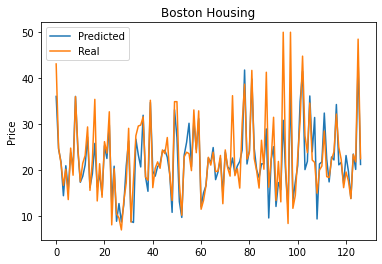

In [49]:
plt.plot(bosYPred)
plt.plot(bosYTest)
plt.legend(["Predicted", "Real"])
plt.ylabel("Price")
plt.title("Boston Housing")
plt.show()

## Регрессионные модели

### Линейная регрессия (Linear Regression) - регрессия по методу наименьших квадратов

Формально решается оптимизационная задача подбора коэффицинтов $w = (w_1, w_2, \ldots, w_n)$ минимизации целевой функции различия предсказанных значений  $\mathbf{X}w$ и фактической зависимой переменной $y$:

$\displaystyle\min_{w}||\mathbf{X}w - y||_2^2$

In [2]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
dogs = animals[animals["class"] == "dog"][["weight","height"]].to_numpy()
norm = MinMaxScaler()
dogs = norm.fit_transform(dogs)
weight = dogs[:,1]
height = dogs[:,0].reshape(-1,1)

#обучение модели
linReg = linear_model.LinearRegression()
linReg.fit(height, weight)

#построение предсказания
weightPred = linReg.predict(height)

print(f"Параметры прямой: b0 = {linReg.intercept_}, наклон: {linReg.coef_[0]}")
print(f"y = {linReg.intercept_} + {linReg.coef_[0]} x")
print(f"Коэффициент детерминации R2: {linReg.score(height, weight)}")


Параметры прямой: b0 = 0.14208054462838304, наклон: 0.7200325918850387
y = 0.14208054462838304 + 0.7200325918850387 x
Коэффициент детерминации R2: 0.6396826675513356


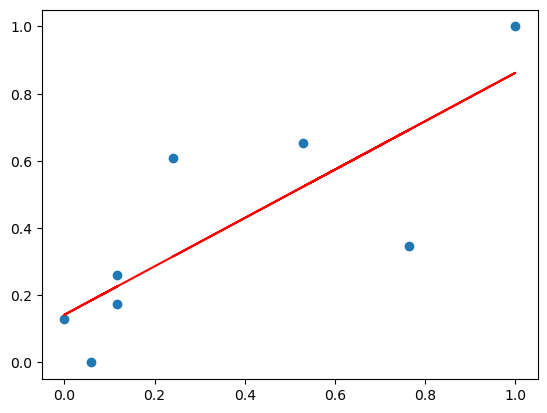

In [3]:
plt.scatter(height, weight)
plt.plot(height,weightPred, color="red")

plt.show()


### Гребневая регрессия (Ridge Regression)

Гребневая регрессия решает некоторые проблемы обычных методов наименьших квадратов, налагая штраф на размер коэффициентов. Коэффициенты гребня минимизируют оштрафованную остаточную сумму квадратов:

$\displaystyle\min_w||\mathbf{X}w - y||_2^2 + \alpha ||w||_2^2$

Данный метод направлен на снижение влияния корреляции между независимыми переменными. Часто возникает в моделях с большим числом параметров.


In [4]:
rig = linear_model.Ridge(alpha=.5)
rig.fit(height, weight)

#построение предсказания
wRigPred = rig.predict(height)

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")
print(f"Коэффициент детерминации R2: {rig.score(height, weight)}")

Параметры прямой: b0 = 0.22967254467366824, наклон: 0.4723712196156251
y = 0.22967254467366824 + 0.4723712196156251 x
Коэффициент детерминации R2: 0.5640034168452055


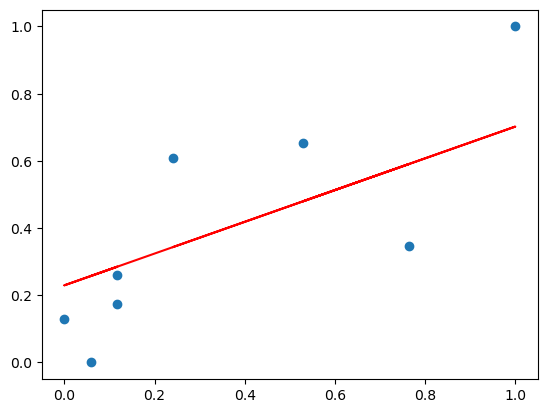

In [5]:
plt.scatter(height, weight)
plt.plot(height,wRigPred, color="red")

plt.show()


#### Установка параметра регуляризации

linear_model.RidgeCV выполняет подбор оптимального значения $\alpha$ на сетке с использованием кросс-валидации на GridSearchCV


In [107]:
rcv = linear_model.RidgeCV( alphas=np.logspace(-6, 6, 13) )
rcv.fit(height, weight)
rcv.alpha_

1e-06

### Лассо (LASSO - )

Линейная модель с регуляризацией L1
Целевая функция имеет вид:

$\left(\frac{1}{2 \cdot n\_samples}\right) ||y - Xw||^2_2 + \alpha ||w||_1$


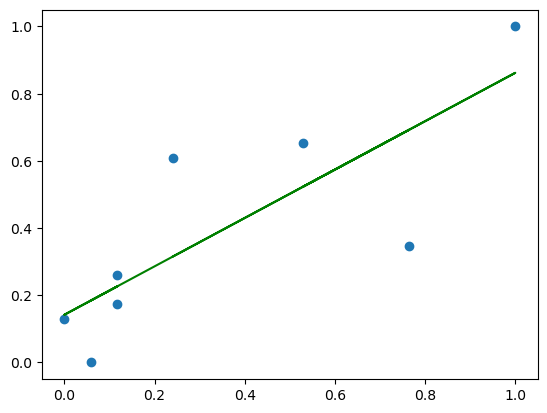

MSE: 0.034812086319694624, MAE: 0.1484564997522293, R2: 0.6396826675513356


In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

lasso = Lasso()

#поиск параметра "альфа" на логарифмической сетке GridSearchCV от 10^-15 до 10^15
parameters = {"alpha" : np.logspace(-15,15,31)}
lassoCV = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)
#lassoCV = GridSearchCV(lasso, parameters, scoring="r2", cv = 5)

lassoCV.fit(height, weight)
lassoPred = lassoCV.predict(height)

#print(lassoCV.best_params_)
#print(lassoCV.best_score_)

plt.scatter(height, weight)
plt.plot(height,lassoPred, color="green")
plt.show()

lassoMSE = ((lassoPred - weight)**2).mean()
lassoMAE = np.abs(lassoPred - weight).mean()
lassoR2 = r2_score(weight, lassoPred)
print(f"MSE: {lassoMSE}, MAE: {lassoMAE}, R2: {lassoR2}")

### Логистическая регрессия

Несмотря на наличие слова "регрессия", данный вид задачи установления связи между зависимой переменной $Y$ и предикторами $X$ относится к алгоритмам **классификации**. Тем не менее, формально выполняется расчет значения целевой переменной в диапазоне $(0,1)$, что интерпретируется как вероятность принадлежности к заданному в задаче классу.

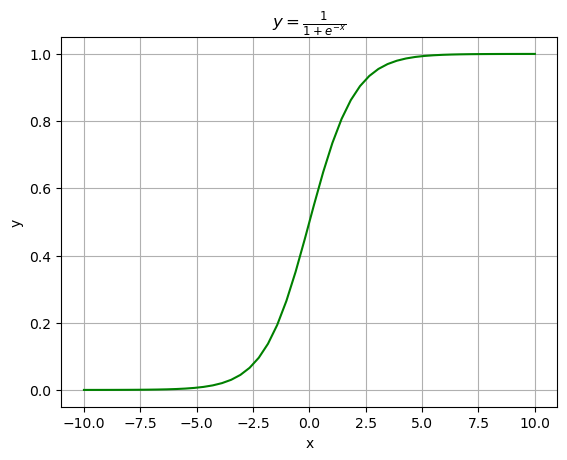

In [10]:
lx = np.linspace(-10.0, 10.0)
ly = 1.0 / (1.0 + np.exp(-lx))

plt.plot(lx, ly, "g-")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.title(r"$y = \frac{1}{1+e^{-x}}$")
plt.show()

In [1]:
import pandas as pd
import zipfile
zf = zipfile.ZipFile("archive.zip", "r")
#zf.namelist() # 'Surgical-deepnet.csv'
with zf.open("Surgical-deepnet.csv") as f:
    surgical = pd.read_csv(f)

Данные: https://www.kaggle.com/datasets/omnamahshivai/surgical-dataset-binary-classification?select=Surgical-deepnet.csv

In [2]:
surgical.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,...,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,...,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,...,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


In [3]:
surgical.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

<AxesSubplot:>

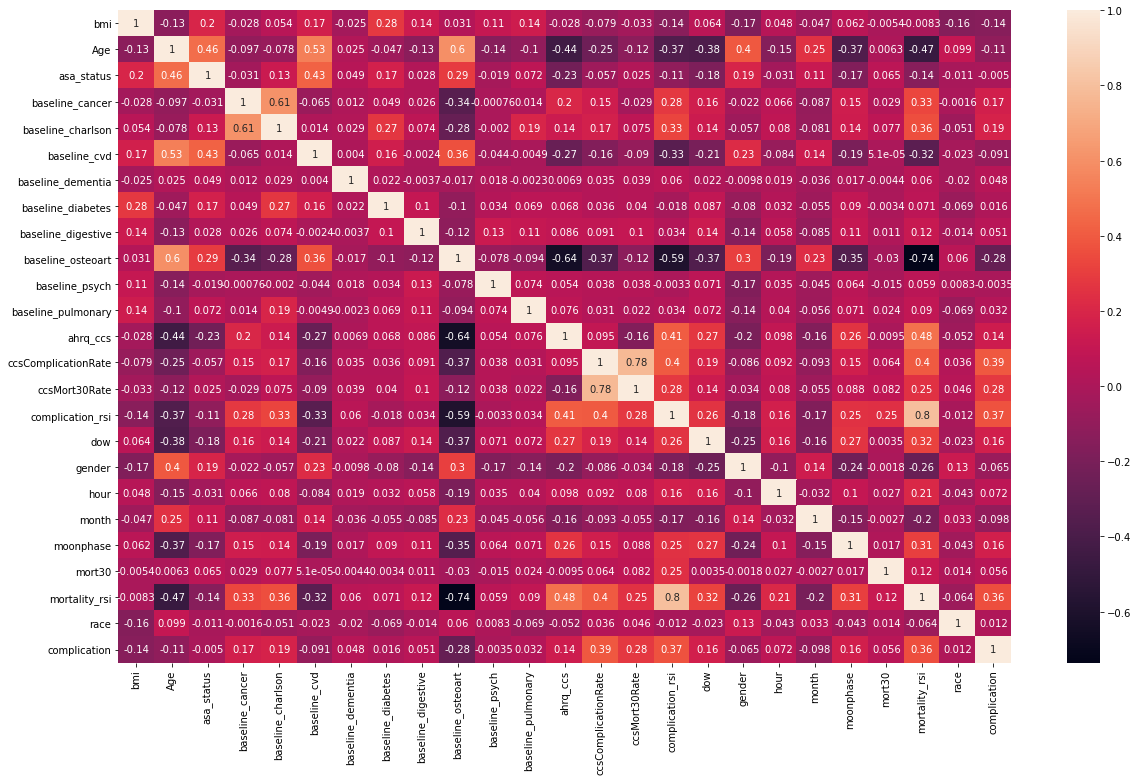

In [6]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(surgical.corr(), annot = True)

Разделим зависимую переменную и предикторы

В качестве зависимой целевой переменной будет признак наличия осложнений

In [7]:
X = surgical.drop("complication", axis = 1).copy()
Y = surgical.iloc[:,-1]
X.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race
0,19.31,59.2,1,1,0,0,0,0,0,0,...,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.001962,0.00,2,0,7.68,5,3,0,0.08,1
3,18.49,59.0,1,0,1,0,0,1,1,0,...,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.002764,0.00,0,0,7.88,11,0,0,0.00,1


In [8]:
Y.value_counts()

0    10945
1     3690
Name: complication, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

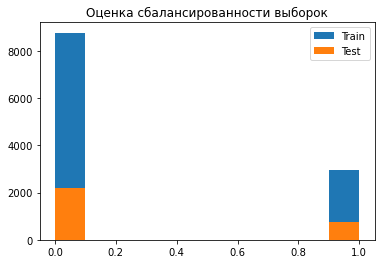

In [10]:
plt.hist(Ytrain, label = "Train")
plt.hist(Ytest, label = "Test")
plt.legend()
plt.title("Оценка сбалансированности выборок")
plt.show()

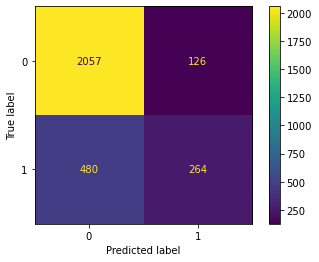

In [15]:
from sklearn.linear_model import LogisticRegression

logRes = LogisticRegression(random_state = 0, max_iter = 1000)
lrModel = logRes.fit(Xtrain, Ytrain)
Ypred = lrModel.predict(Xtest)
Yprob = lrModel.predict_proba(Xtest)[:,1] #для ROC-кривой

confMatr = confusion_matrix(Ytest, Ypred)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

#### Можно видеть очень большое число ложно-отрицательных результатов (предсказали отсутствие осложнений, а они есть!)!!!

Модель получилась плохая. Б нее включены ВСЕ признаки. Далее необходимо тщательнее анализировать данные, убирать не влияющие на выход переменные (смотрим по корреляции), проанализировать наличие выбросов в предикторах 

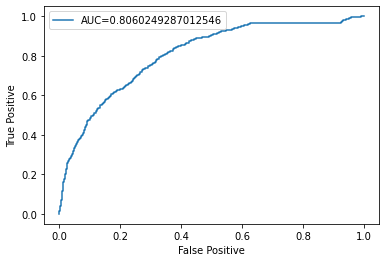

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

auc = roc_auc_score( Ytest, Yprob )
fpr, tpr, thresholds = roc_curve(Ytest, Yprob)
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()